# Es gruppo IRIS kmeans
2024.11.27

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, homogeneity_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import numpy as np


In [2]:
iris = load_iris()

iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Visualizzazione dati

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


c:\Users\Utente\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


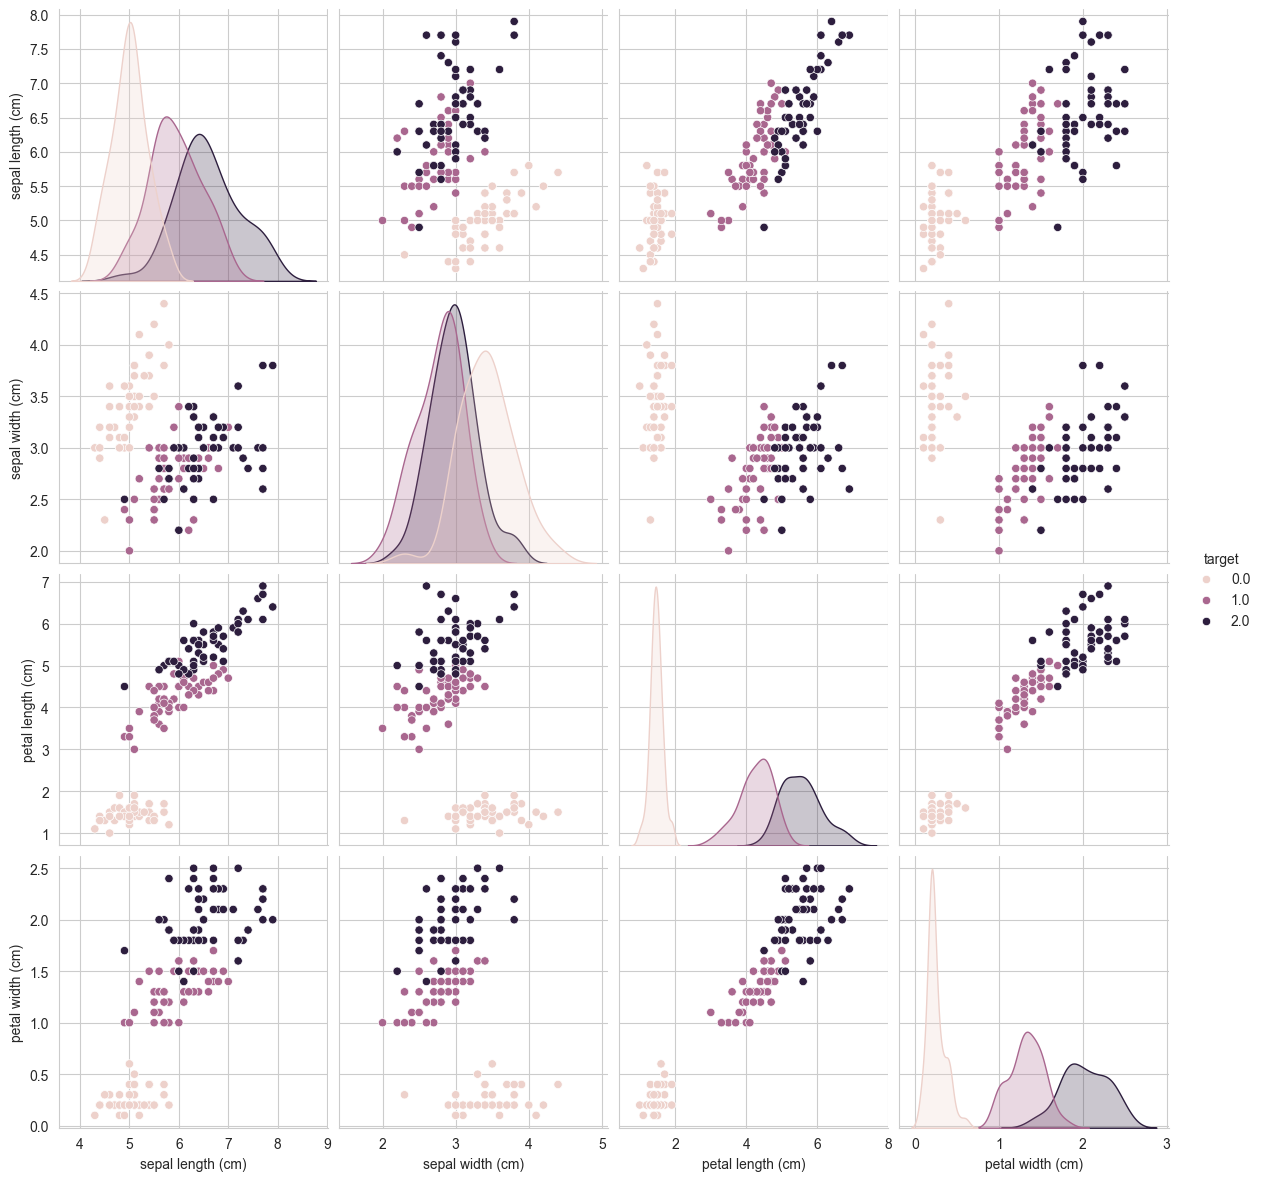

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(iris_df,hue="target",height=3);
plt.show()

# K-Means clustering Pipeline

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=666)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('kmeans', KMeans(n_clusters=3))
    ])    

In [19]:
# Definizione della distribuzione dei parametri
param_dist = {
    'pca__n_components': np.arange(2,5),   
}



In [20]:
# Configurazione della validazione incrociata stratificata
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurazione di RandomizedSearchCV
grid_search = GridSearchCV(
    pipeline, 
    param_grid=param_dist,
    cv=cv,
    scoring='accuracy')

In [21]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('kmeans', KMeans(n_clusters=3))]),
             param_grid={'pca__n_components': array([2, 3, 4])},
             scoring='accuracy')

In [22]:
model_opt = grid_search.best_estimator_

model_opt.fit(X_train, y_train)

y_pred = model_opt.predict(X_test)


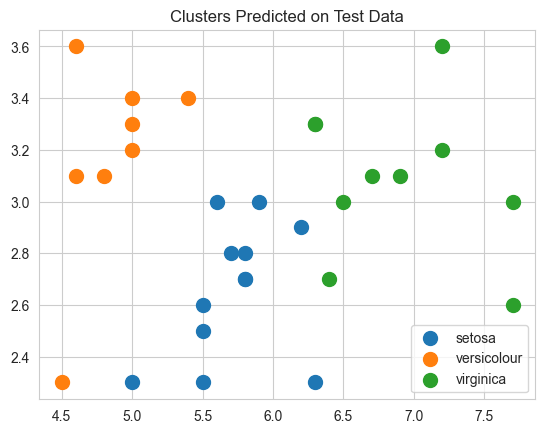

In [29]:
#Visualising the clusters
fig, ax = plt.subplots()

ax.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], s = 100, label = 'setosa')
ax.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], s = 100, label = 'versicolour')
ax.scatter(X_test[y_pred == 2, 0], X_test[y_pred == 2, 1], s = 100, label = 'virginica')
ax.set_title("Clusters Predicted on Test Data")
ax.legend()

In [100]:
#adjusted_rand_score, homogeneity_score

print(f"Adjusted Rand Score: {adjusted_rand_score(y_test, y_pred):.3f}")
print(f"Homogeneity Score: {homogeneity_score(y_test, y_pred):.3f}")

Adjusted Rand Score: 0.619
Homogeneity Score: 0.680


## Confronto cluster reali e predetti su INTERO dataset

In [ ]:
y_pred_df = model_opt.predict(iris_df.drop('target', axis=1))

iris_df['predicted_class'] = y_pred_df

c:\Users\Utente\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
#1 reale -> 0 pred
#0 reale -> 1 pred
#2 reale -> 2 pred

# remap values in predicted_class column 
iris_df['predicted_class'] = iris_df['predicted_class'].replace({0: 1, 1: 0, 2: 2})


NameError: name 'axes' is not defined

### sepal length vs sepal width

Text(0.5, 1.0, 'Predicted Classes')

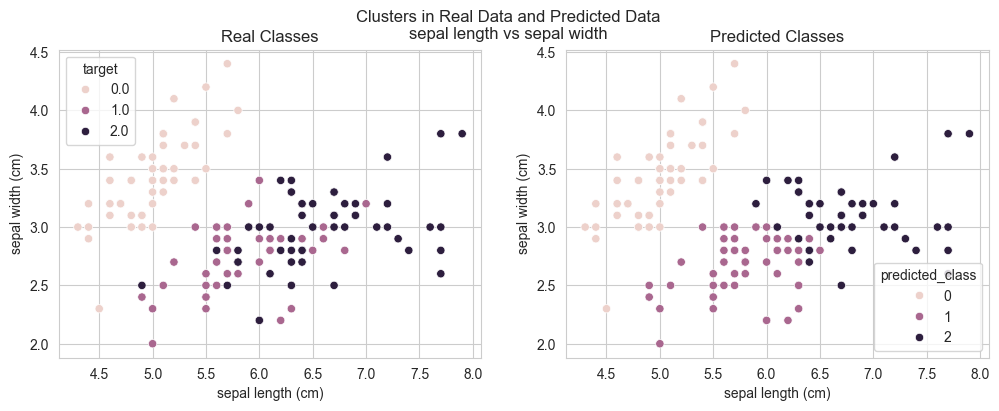

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', ax=axes[0])
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='predicted_class', ax=axes[1])
fig.suptitle("Clusters in Real Data and Predicted Data\nsepal length vs sepal width")
axes[0].set_title("Real Classes")
axes[1].set_title("Predicted Classes")


### sepal length vs petal width

Text(0.5, 1.0, 'Predicted Classes')

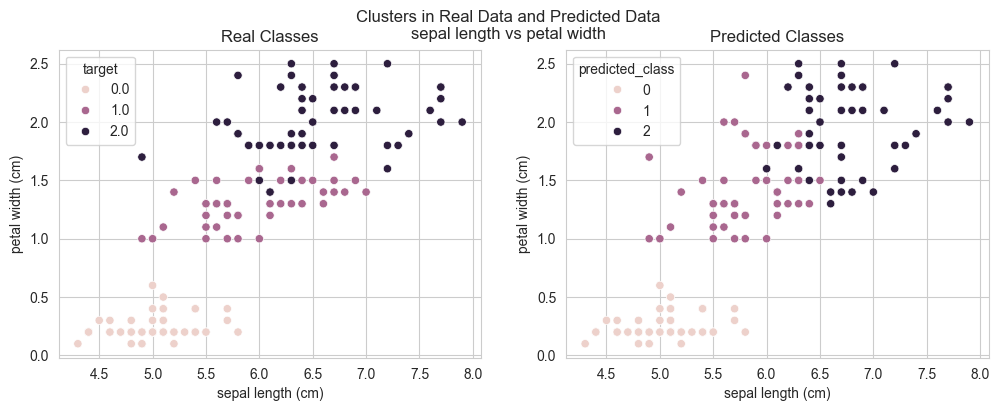

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.scatterplot(data=iris_df, x='sepal length (cm)', y='petal width (cm)', hue='target', ax=axes[0])
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='petal width (cm)', hue='predicted_class', ax=axes[1])
fig.suptitle("Clusters in Real Data and Predicted Data\nsepal length vs petal width")
axes[0].set_title("Real Classes")
axes[1].set_title("Predicted Classes")


### petal length vs petal width

Text(0.5, 1.0, 'Predicted Classes')

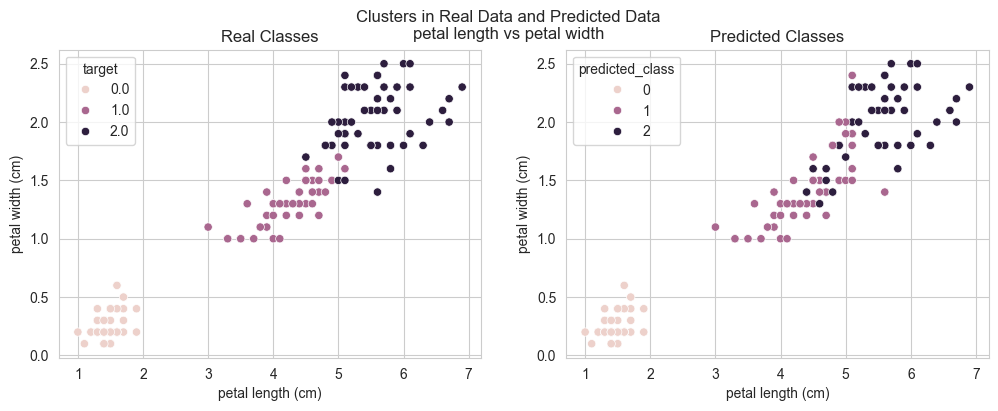

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='target', ax=axes[0])
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='predicted_class', ax=axes[1])
fig.suptitle("Clusters in Real Data and Predicted Data\npetal length vs petal width")
axes[0].set_title("Real Classes")
axes[1].set_title("Predicted Classes")


### petal length vs sepal width

Text(0.5, 1.0, 'Predicted Classes')

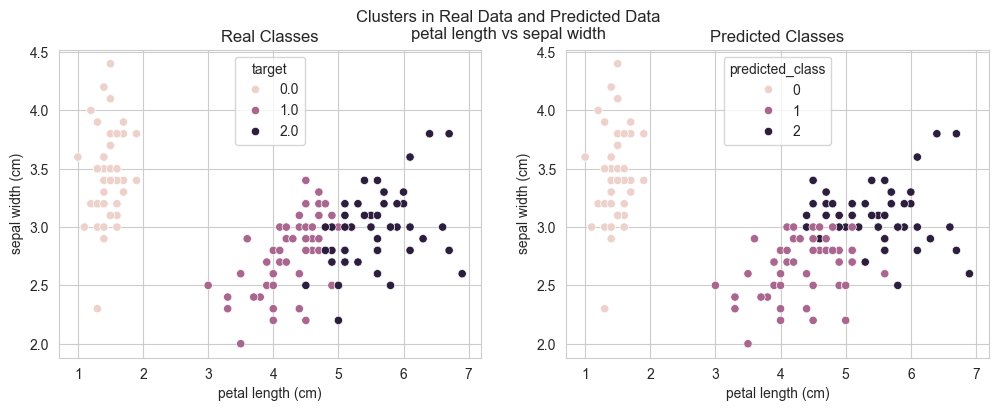

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.scatterplot(data=iris_df, x='petal length (cm)', y='sepal width (cm)', hue='target', ax=axes[0])
sns.scatterplot(data=iris_df, x='petal length (cm)', y='sepal width (cm)', hue='predicted_class', ax=axes[1])
fig.suptitle("Clusters in Real Data and Predicted Data\npetal length vs sepal width")
#centers = pipeline.clustercenters
#axes[1].scatter(centers[:, 0], centers[:, 1], c='black', s=200);
axes[0].set_title("Real Classes")
axes[1].set_title("Predicted Classes")


## Confronto clusters solo su TEST data

In [58]:
iris_test_df = pd.DataFrame(data=np.c_[X_test, y_test], columns=iris['feature_names'] + ['target'])

In [73]:
iris_test_df['predicted_class'] = y_pred

iris_test_df['predicted_class'] = iris_test_df['predicted_class'].replace({1: 0, 0: 1, 2: 2})


### sepal length vs sepal width

Text(0.5, 1.0, 'Predicted Classes')

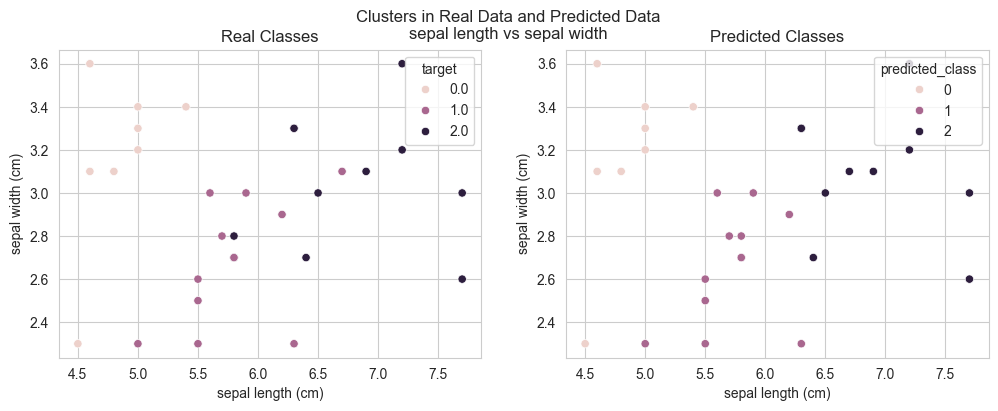

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.scatterplot(data=iris_test_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', ax=axes[0])
sns.scatterplot(data=iris_test_df, x='sepal length (cm)', y='sepal width (cm)', hue='predicted_class', ax=axes[1])
fig.suptitle("Clusters in Real Data and Predicted Data\nsepal length vs sepal width")
axes[0].set_title("Real Classes")
axes[1].set_title("Predicted Classes")


### sepal lengt vs petal width

Text(0.5, 1.0, 'Predicted Classes')

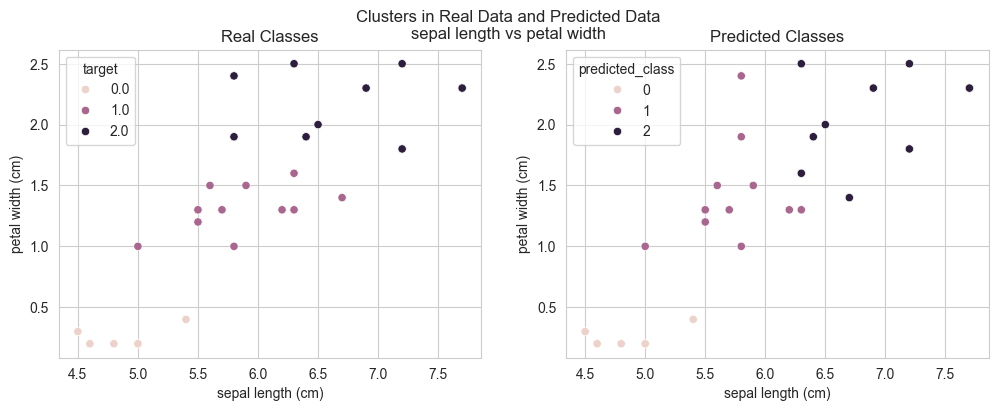

In [75]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.scatterplot(data=iris_test_df, x='sepal length (cm)', y='petal width (cm)', hue='target', ax=axes[0])
sns.scatterplot(data=iris_test_df, x='sepal length (cm)', y='petal width (cm)', hue='predicted_class', ax=axes[1])
fig.suptitle("Clusters in Real Data and Predicted Data\nsepal length vs petal width")
axes[0].set_title("Real Classes")
axes[1].set_title("Predicted Classes")


### petal length vs petal width

Text(0.5, 1.0, 'Predicted Classes')

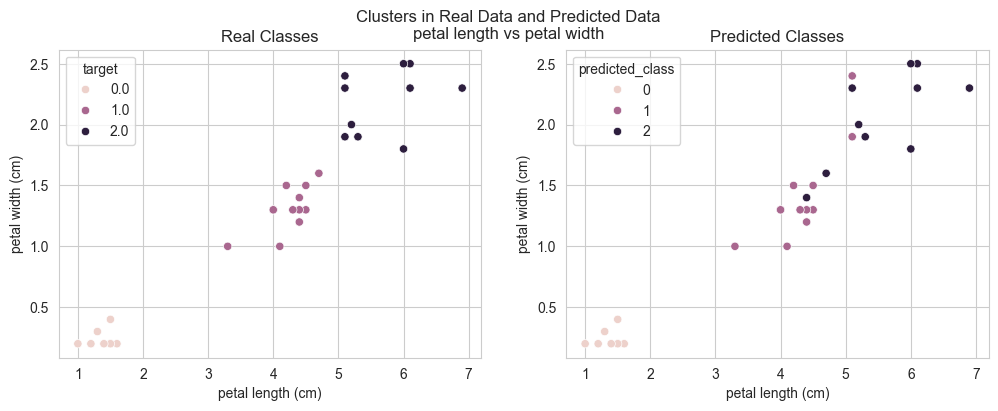

In [76]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.scatterplot(data=iris_test_df, x='petal length (cm)', y='petal width (cm)', hue='target', ax=axes[0])
sns.scatterplot(data=iris_test_df, x='petal length (cm)', y='petal width (cm)', hue='predicted_class', ax=axes[1])
fig.suptitle("Clusters in Real Data and Predicted Data\npetal length vs petal width")
axes[0].set_title("Real Classes")
axes[1].set_title("Predicted Classes")


### petal length vs sepal width

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

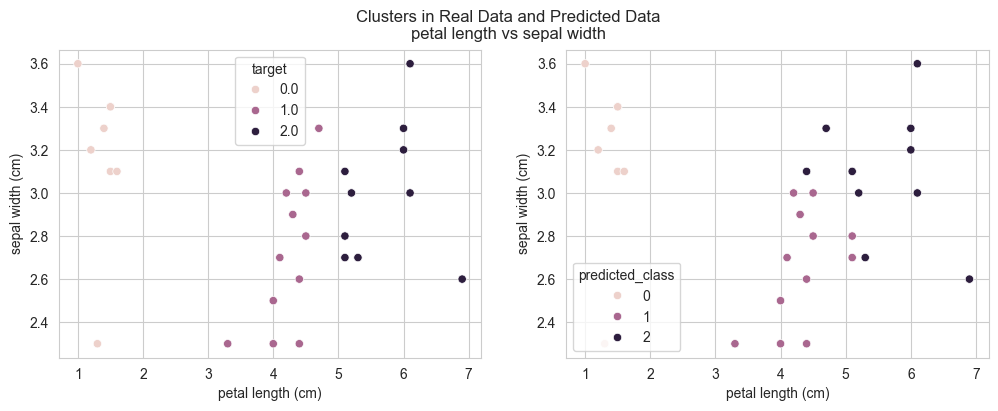

In [84]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.scatterplot(data=iris_test_df, x='petal length (cm)', y='sepal width (cm)', hue='target', ax=axes[0])
sns.scatterplot(data=iris_test_df, x='petal length (cm)', y='sepal width (cm)', hue='predicted_class', ax=axes[1])
fig.suptitle("Clusters in Real Data and Predicted Data\npetal length vs sepal width")
centers = pipeline["kmeans"].cluster_centers_
axes[1].scatter(centers[:, 0], centers[:, 1], c='black', s=200);
axes[0].set_title("Real Classes")
axes[1].set_title("Predicted Classes")


# Recuperare centroidi dalla pipeline

In [85]:
pipeline.kmeans

AttributeError: 'Pipeline' object has no attribute 'kmeans'

In [86]:
pipeline["kmeans"]

KMeans(n_clusters=3)

In [87]:
pipeline["kmeans"].cluster_centers_

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [90]:
type(pipeline["kmeans"])

sklearn.cluster._kmeans.KMeans

In [93]:
pipeline["kmeans"].n_iter_

AttributeError: 'KMeans' object has no attribute 'n_iter_'

In [96]:
kmeansmodel = pipeline.named_steps['kmeans']
print(kmeansmodel.cluster_centers_)

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [97]:
kmeansmodel

KMeans(n_clusters=3)

In [ ]:
kmeansinit = KMeans(n_clusters=2, init=cluster_centers, n_init=1)
kmeans_init.fit(data)
kmeans_init.cluster_centers